In [3]:
import os
import numpy as np
from netCDF4 import Dataset
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap

In [55]:

data_dir = '../results/modis/chla/'
varname = 'chlor_a'
cmin, cmax = -2, 2
# Initialize a dictionary to hold the data for each month.
monthly_data = {month: [] for month in range(1, 13)}
yearly_data = {year: [] for year in range(2018, 2023)}
season_data  = {"winter": [], "spring": [], "summar": [],"autumn": []}
all_data = {"all": []}

print(monthly_data)
print(yearly_data)
print(season_data)

# Assuming these are the coordinates you want to crop to
# lat_min_crop, lat_max_crop = 34.3, 35.7  # Update these values as needed
# lon_min_crop, lon_max_crop = 138.3, 140.23  # Update these values as needed

# lat_min_crop, lat_max_crop = 34.5, 35.4
# lon_min_crop, lon_max_crop = 138.82, 139.9
lat_min_crop, lat_max_crop = 34.5, 35.4
lon_min_crop, lon_max_crop = 138.9, 139.9
# lat_min_crop, lat_max_crop = 34.4, 35.7
# lon_min_crop, lon_max_crop = 138.35, 140.2
# rectangle_coords = [(35.7,  138.35), (35.7, 140.2), (34.4, 140.2), (34.4,  138.35), (35.7,  138.35)]



{1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: []}
{2018: [], 2019: [], 2020: [], 2021: [], 2022: []}
{'winter': [], 'spring': [], 'summar': [], 'autumn': []}


In [57]:
# for fol in os.listdir(data_dir):
#     print(data_dir+fol)
    # Loop through files and accumulate data
for file_name in os.listdir(data_dir):
    if file_name.endswith('.nc'):
        year, month = int(file_name[1:5]), int(file_name[5:7])  # Modis
        # year, month = int(file_name[2:6]), int(file_name[6:8])   # GCOMC
        if year < 2018 or year > 2022:
            continue
        print(file_path)    
        file_path = os.path.join(data_dir, file_name)
        with Dataset(file_path, 'r') as nc:
            data = np.ma.squeeze(nc[varname][:])
            lat = nc['lat'][:]
            lon = nc['lon'][:]
            
            # Find indices for cropping
            lat_inds = np.where((lat >= lat_min_crop) & (lat <= lat_max_crop))[0]
            lon_inds = np.where((lon >= lon_min_crop) & (lon <= lon_max_crop))[0]
            # Crop data
               # Now add a check to ensure the indices are within the bounds of the array
            if lat_inds.size > 0 and lon_inds.size > 0:
               # Adjust the slicing based on the actual dimensions of sds
               data_cropped = data[lat_inds, :][:, lon_inds]  # This is the updated line for a 2D array
               lat_cropped = lat[lat_inds]
               lon_cropped = lon[lon_inds]
            else:
               print("No data within specified crop bounds.")
            
            # print(np.ma.mean(data_cropped))    
            # sds_cropped = sds[:, lat_inds, :][:, :, lon_inds]  # Assuming sds has a shape of [time, lat, lon]
            lat_cropped = lat[lat_inds]
            lon_cropped = lon[lon_inds]
            # Convert masked values to NaN
            data_cropped = np.where(data_cropped.mask, np.nan, data_cropped)
            all_data["all"].append(data_cropped)

            yearly_data[year].append(data_cropped)
            monthly_data[month].append(data_cropped)
            if month in [12,1,2]:
                season_data["winter"].append(data_cropped)
            elif month in [3,4,5]:
                season_data["spring"].append(data_cropped)                
            elif month in [6,7,8]:
                season_data["summar"].append(data_cropped)    
            else: # 9 10 11
                season_data["autumn"].append(data_cropped)    
print(len(season_data))            

../results/modis/chla/A200207_CHL_NW_month.nc
../results/modis/chla/A201801_CHL_NW_month.nc
../results/modis/chla/A201802_CHL_NW_month.nc
../results/modis/chla/A201803_CHL_NW_month.nc
../results/modis/chla/A201804_CHL_NW_month.nc
../results/modis/chla/A201805_CHL_NW_month.nc
../results/modis/chla/A201806_CHL_NW_month.nc
../results/modis/chla/A201807_CHL_NW_month.nc
../results/modis/chla/A201808_CHL_NW_month.nc
../results/modis/chla/A201809_CHL_NW_month.nc
../results/modis/chla/A201810_CHL_NW_month.nc
../results/modis/chla/A201811_CHL_NW_month.nc
../results/modis/chla/A201812_CHL_NW_month.nc
../results/modis/chla/A201901_CHL_NW_month.nc
../results/modis/chla/A201902_CHL_NW_month.nc
../results/modis/chla/A201903_CHL_NW_month.nc
../results/modis/chla/A201904_CHL_NW_month.nc
../results/modis/chla/A201905_CHL_NW_month.nc
../results/modis/chla/A201906_CHL_NW_month.nc
../results/modis/chla/A201907_CHL_NW_month.nc
../results/modis/chla/A201908_CHL_NW_month.nc
../results/modis/chla/A201909_CHL_

In [59]:

from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plot, colors
# Define your color list in hex
hex_colors_chl = [
    '#3500a8', '#0800ba', '#003fd6',
    '#00aca9', '#77f800', '#ff8800', 
    '#b30000', '#920000', '#880000'
]

# hex_colors_sst = [
#    '#ffffff','#b7f0ae','#21f600','#0000FF','#FDFF92','#FF2700','#d600ff'
# ]
# hex_colors_sst = [
#     '#ffffff',  # white
#     '#e8f8ff',  # very light blue (cold)
#     '#b7f0ae',  # light green
#     '#8ae68a',  # intermediate green
#     '#21f600',  # bright green (warm)
#     '#7bff7b',  # intermediate between green and blue
#     '#0000FF',  # blue
#     '#7f92ff',  # light blue (getting warmer)
#     '#FDFF92',  # light yellow (warm)
#     '#FFD700',  # gold
#     '#FFA500',  # orange
#     '#FF2700',  # red (hot)
#     '#e60000',  # deep red (hotter)
#     '#d600ff',  # purple (very hot)
#     '#a500ff',  # deep purple (even hotter)
# ]
# hex_colors_sst = [
# "#90EE90", "#2E8B57", "#228B22", "#006400",
#    "#FFFFE0", "#FFD700", "#CC7722", "#DAA520",
#     "#FFE5B4", "#FF7F50", "#FFA500", "#CC5500",
#    "#FFC0CB", "#FF0000", "#DC143C", "#800000"
# ]
# hex_colors_sst = [

#     "#90EE90",  # Light Green 1
#     "#ADFF2F",  # Light Green 2
#     "#CCE599",  # Light Green 3
#     "#FFFFE0",  # Light Yellow 1
#     "#FFF59D",  # Light Yellow 2
#     # "#FFEB4C",  # Light Yellow 3
#     "#FFD700",  # Gold (Light Orange 1)
#     "#FFA500",  # Orange 2
#     # "#FF8C00",  # Light Orange 3
#     "#FFC0CB",  # Light Pink (Light Red 1)
#     "#FF9999",  # Light Red 2
#     "#FF7F50"   # Coral (Light Red 3)
# ]
# hex_colors_sst = [
#     '#FF2700',  # Red
#     '#FFA500',  # Orange
#     '#FDFF92',  # Yellow
#     '#b7f0ae',  # Light Green
#     '#21f600',  # Bright Green
#     '#0000FF',  # Blue
#     '#4b0082',  # Indigo
#     '#d600ff',  # Purple (Violet)
#     '#a500ff',  # Deep Purple (darker Violet)
#     '#ffffff'  # White (for peak temperatures)
# ]
print(len(season_data))

# # Convert hex color list to RGB
rgb_colors = [colors.hex2color(color) for color in hex_colors_chl]
# rgb_colors = ["blue","#6495ED", "#008080","green","#28B463", "yellow","#FFC300","#FFBF00","orange","#DE3163","red","#CD5C5C"]
# rgb_colors = ["green","lightgreen", "yellow", "orange", "#FF474C", "red"]
# monthly_averages = {month: np.nanmean(np.stack(data_list), axis=0) for month, data_list in monthly_data.items() if data_list}
monthly_averages = {month: np.nanmean(np.stack(data_list), axis=0) for month, data_list in monthly_data.items() if data_list}
yearly_averages = {year: np.nanmean(np.stack(data_list), axis=0) for year, data_list in yearly_data.items() if data_list}
season_averages = {season: np.nanmean(np.stack(data_list), axis=0) for season, data_list in season_data.items() if data_list}
all_averages = {season: np.nanmean(np.stack(data_list), axis=0) for season, data_list in all_data.items() if data_list}


4


C:\Users\Robel\AppData\Local\Temp\ipykernel_10468\2776659294.py:70: RuntimeWarning: Mean of empty slice
  monthly_averages = {month: np.nanmean(np.stack(data_list), axis=0) for month, data_list in monthly_data.items() if data_list}
C:\Users\Robel\AppData\Local\Temp\ipykernel_10468\2776659294.py:71: RuntimeWarning: Mean of empty slice
  yearly_averages = {year: np.nanmean(np.stack(data_list), axis=0) for year, data_list in yearly_data.items() if data_list}
C:\Users\Robel\AppData\Local\Temp\ipykernel_10468\2776659294.py:72: RuntimeWarning: Mean of empty slice
  season_averages = {season: np.nanmean(np.stack(data_list), axis=0) for season, data_list in season_data.items() if data_list}
C:\Users\Robel\AppData\Local\Temp\ipykernel_10468\2776659294.py:73: RuntimeWarning: Mean of empty slice
  all_averages = {season: np.nanmean(np.stack(data_list), axis=0) for season, data_list in all_data.items() if data_list}


In [29]:
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.colors import Colormap

# # Define color positions within the range (0 to 1)
# color_positions = [0, 0.25, 0.5, 0.75, 0.85, 1]

# # Define desired colors
# rgb_colors = ["green","lightgreen", "yellow", "orange", "#FF474C", "red"]

# # Create a colormap object
# cmap = Colormap(name='sst_colors', colors=rgb_colors, positions=color_positions)

# # Function to slightly lighten colors (adjust factor for desired lightness)
# def lighten_color(color, factor=0.1):
#   red, green, blue, alpha = color
#   return tuple([min(1.0, c + factor) for c in (red, green, blue)])

# # Generate list of colors with smooth transitions and slight lightening
# num_steps = 256
# sst_colors = [lighten_color(cmap(i)) for i in np.linspace(0, 1, num_steps)]


12
12
[[-- -- -- ... 1.104761004447937 1.2631173133850098 1.237581729888916]
 [-- -- -- ... 0.9466136693954468 0.9796513319015503 1.2034825086593628]
 [-- -- -- ... 1.2476112842559814 1.087280035018921 0.7718367576599121]
 ...
 [-0.46032798290252686 -0.45352938771247864 -0.46291226148605347 ...
  -0.5623856782913208 -0.5551307797431946 -0.55917888879776]
 [-0.457696795463562 -0.4639350473880768 -0.4801636338233948 ...
  -0.557427167892456 -0.5620291233062744 -0.5476219654083252]
 [-0.47507473826408386 -0.47464853525161743 -0.47457581758499146 ...
  -0.5639162063598633 -0.554455041885376 -0.5475444197654724]]


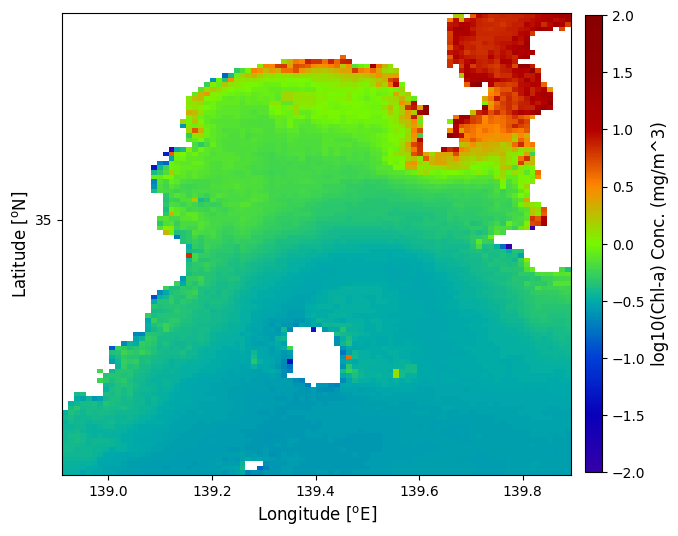

In [63]:
cmin, cmax = -2,2
# cmin, cmax = 10, 30

print(len(monthly_averages))
print(len(monthly_averages))
for season, sds_cropped in all_averages.items():    # Visualisation with basemap
    # print("runnign")
    if len(lon_cropped.shape) == 1:
        lon_cropped, lat_cropped = np.meshgrid(lon_cropped, lat_cropped)
    lon_0, lat_0 = (lon_cropped.min() + lon_cropped.max()), (lat_cropped.min() + lat_cropped.max()) / 2
    m = Basemap(llcrnrlon=lon_cropped.min(), llcrnrlat=lat_cropped.min(), 
                        urcrnrlon=lon_cropped.max(), urcrnrlat=lat_cropped.max(), resolution='i', 
                        lon_0=lon_0, lat_0=lat_0, projection='merc')

    # print(sds_cropped)
    sds_cropped_log = np.ma.masked_less_equal(sds_cropped, 0)  # Mask non-positive values
    sds_cropped_log = np.ma.log10(sds_cropped_log)  # Apply log10 to the data
    print(sds_cropped_log)
    sds_cropped = sds_cropped_log

    # Visualisation without basemap
    # Adjust figsize to change the aspect ratio
    fig, ax = plot.subplots(figsize=(7, 6))  # Adjust the width and height to better suit your data aspect ratio

    # figure bounds
    extent = [lon_cropped.min(), lon_cropped.max(), lat_cropped.min(), lat_cropped.max()]

    # Land mask
    # mask = np.where(~sds_cropped.mask, np.nan, 0)
    ax.imshow(sds_cropped, cmap='gray', vmin=cmin, vmax=cmax, extent=extent)

    # Create a colormap object
    custom_colormap = LinearSegmentedColormap.from_list('custom', rgb_colors)

    # print(sds_cropped_log.max(), sds_cropped_log.min())

    # We no longer use LogNorm here since we've manually applied log10
    # ims = ax.imshow(sds_cropped_log, cmap='jet', extent=extent)
    # ims = ax.imshow(sds_cropped,vmin=cmin, vmax=cmax,   extent=extent)

    ims = ax.imshow(sds_cropped,vmin=cmin, vmax=cmax,  cmap=custom_colormap, extent=extent)

    # # Figure labels
    ax.set_xlabel('Longitude [$^\mathregular{o}$E]', fontsize="12")
    ax.set_ylabel('Latitude [$^\mathregular{o}$N]', fontsize="12")
    ax.set_yticks(range(int(np.ceil(lat_cropped.min())), int(np.ceil(lat_cropped.max())), 1))
    # ax.set_title(time[0].strftime('%b %Y'))

    # # Colourbar
    cbar = fig.colorbar(ims, ax=ax, orientation='vertical', fraction=0.0324, pad=0.025,  aspect=26)
    cbar.set_label('log10(Chl-a) Conc. (mg/m^3)', fontsize="12")

    # ticks = [ims.get_clim()[0],0, ims.get_clim()[1]] # This gets the color limit range
    # cbar.set_ticks(ticks)
    # cbar.set_ticklabels([f'{ticks[0]:.2f}', f'{ticks[1]:.2f}', f'{ticks[2]:.2f}']) # Format as desired

    # Small Sagami Bay
    lat_min, lat_max = 35.124, 35.34
    lon_min, lon_max = 139.115, 139.68
    plt.savefig(f'seasonal/final/MODIS_20182022_average_chla_{season:02}_test2.png', dpi=300, bbox_inches='tight')


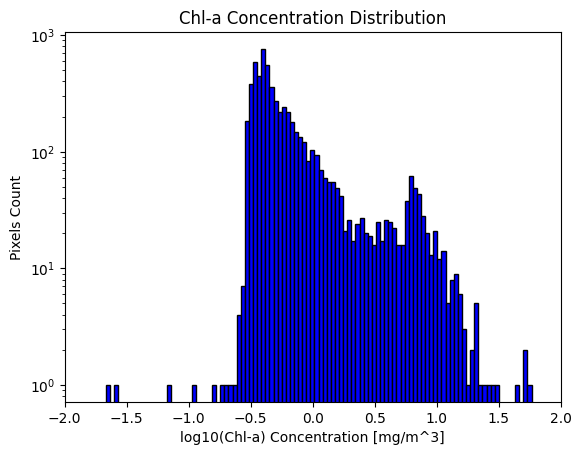

In [85]:
# show data distribution in histogram for last month
for season, sds_cropped in all_averages.items():    # Visualisation with basemap
    fig, ax = plt.subplots()
    n_bins = 'auto'
    pixel_values = sds_cropped_log.flatten()
    # pixel_values = pixel_values[~pixel_values.mask]  # Remove masked values (NaN or inf values)
    
    # ax.hist(sds_cropped_log.compressed(), bins=100, color='blue', alpha=0.7)
    ax.hist(pixel_values, bins=n_bins, color='blue', edgecolor='black')
    plt.xlim(-2, 2)
    
    ax.set_yscale('log')
    ax.set_xlabel('log10(Chl-a) Concentration [mg/m^3]')
    ax.set_ylabel('Pixels Count')
    ax.set_title('Chl-a Concentration Distribution')
    # print()
    plt.savefig(f'seasonal/final/average_chla_{season:02}_hist.png', dpi=300)
    plt.show()